# Project: Water Potability Prediction

## Table of Contents
<ul>
<li>Introduction</li>
<li>Data Wrangling</li>
<li>Exploratory Data Analysis</li>
<li>Conclusions</li>
</ul>

## Introduction

Water is the most significant resource of life, crucial for supporting the life of most existing creatures and human beings. Living organisms need water with enough quality to continue their lives. There are certain limits of pollutions that water species can tolerate. Exceeding these limits affects the existence of these creatures and threatens their lives.

As per the United Nations (UN) report, about 1.5 million people die each year because of contaminated water-driven diseases. In developing countries, it is announced that 80% of health problems are caused by contaminated water. Five million deaths and 2.5 billion illnesses are reported annually. Such a mortality rate is higher than deaths resulting from accidents, crimes, and terrorist attacks.

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.Therefore, it is very important to suggest new approaches to analyze and, if possible, to predict the water quality.

The goal of this project is to train a machine learning algorithm to predict water portability using a number of features.

### Dataset Description

1. ph: pH of 1. water (0 to 14).

2. Hardness: Capacity of water to precipitate soap in mg/L.

3. Solids: Total dissolved solids in ppm.

4. Chloramines: Amount of Chloramines in ppm.

5. Sulfate: Amount of Sulfates dissolved in mg/L.

6. Conductivity: Electrical conductivity of water in μS/cm.

7. Organic_carbon: Amount of organic carbon in ppm.

8. Trihalomethanes: Amount of Trihalomethanes in μg/L.

9. Turbidity: Measure of light emitting property of water in NTU.

10. Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [3]:
# imporing the necessary libraries
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [5]:
# reading our test data into a pandas dataframe
df_water = pd.read_csv('water_portability_train_dataset.csv')
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [54]:
# makeing the column headers lowercase
df_water.columns = [x.lower() for x in df_water.columns]
df_water.columns

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [55]:
# inspecting our dataset
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   hardness         2293 non-null   float64
 2   solids           2293 non-null   float64
 3   chloramines      2293 non-null   float64
 4   sulfate          2293 non-null   float64
 5   conductivity     2293 non-null   float64
 6   organic_carbon   2293 non-null   float64
 7   trihalomethanes  2293 non-null   float64
 8   turbidity        2293 non-null   float64
 9   potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


There are no missing values in our data and all the data types are acculate.

In [56]:
# chechinking the distribution of our features
df_water.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.082265,196.390335,22074.335334,7.132987,333.393347,425.455702,14.229174,66.499518,3.967153,0.390318
std,1.486029,32.460633,8668.693908,1.573879,36.116271,80.266652,3.341429,16.067742,0.788480,0.487928
min,0.000000,47.432000,320.942611,0.530351,180.206746,201.619737,2.200000,0.738000,1.450000,0.000000
25%,6.262799,176.753500,15825.182571,6.140033,316.552791,363.974060,12.015868,56.329076,3.440753,0.000000
50%,7.080795,196.833001,21153.322827,7.135063,333.775777,420.828362,14.151538,66.396293,3.947138,0.000000
75%,7.873272,216.441172,27345.174288,8.104498,349.985243,480.715208,16.450990,77.182622,4.503661,1.000000
max,14.000000,317.338124,56351.396304,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Exploratory Data Analysis

We will be performing univariate and bivariate EDA on our dataset to see how our features are distributed and see how they they affect our taget variable (potability)

In [66]:
# define a function to make histograms and violin plots
def HistViolinPlot(col,title,data=df_water):
    fig = plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.hist(x=col,data=data)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    plt.subplot(1,2,2)
    sns.violinplot(y=col,data=data,inner="quartile")
    plt.title(title)
    return plt.show()

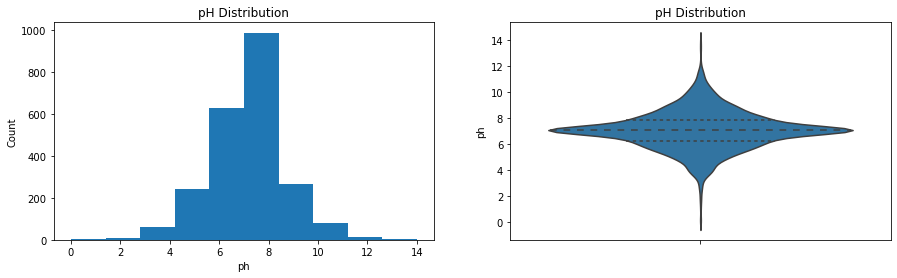

In [68]:
# checking the distribution of our ph
HistViolinPlot('ph','pH Distribution',data=df_water)

We can see of pH values have a unimodal distribution with most of our values in the 7 to 8 range. With a few outliers.

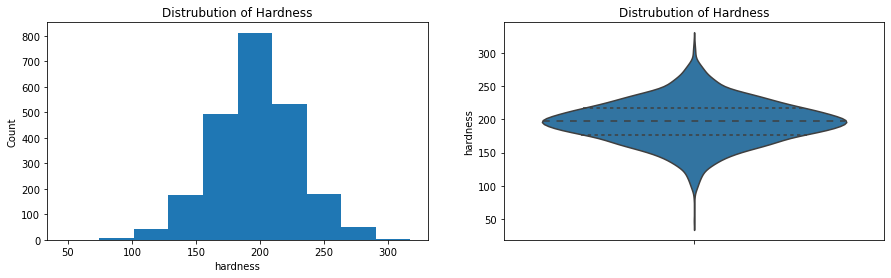

In [63]:
# checking the distribution of hardness
HistViolinPlot('hardness','Distrubution of Hardness',data=df_water)

In [ ]:
# checking distributionof 